In [15]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line tells the computer to bring in the 'pandas' tool
# so we can use its abilities.
file_path = "unclean_smartwatch_health_data.csv"
# This is like saying, "Hey computer, the file we need is right here!"

df = pd.read_csv(file_path)
# This line uses pandas to read the file and puts all the data
# into something called a 'DataFrame'. Think of a DataFrame as
# a neat table with rows and columns, just like in a spreadsheet.

print("First look at our data:")
print(df.head())
# This shows us the first few lines of our table, so we can get
# a sneak peek at what kind of information is inside.

print("\nWhat kind of information do we have?")
print(df.info())
# This gives us a summary of our table, like the names of all the
# columns (the headings at the top) and what type of information
# is in each column (numbers, text, etc.). It also tells us if
# there are any missing pieces of information.

First look at our data:
   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  

What kind of information do we have?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                

In [16]:
# Let's see if we have any missing information in our table.
print("\nWhere are the missing pieces?")
print(df.isnull().sum())
# This tells us, for each column, how many pieces of information
# are missing (it will show a number, and if it's zero, that's good!).

# For columns with numbers, if some are missing, we might fill them in
# with the average value. It's like saying, "If we don't know a friend's
# height, we can guess it's close to the average height of the group."
for col in df.select_dtypes(include=np.number):
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())
        print(f"\nFilled missing values in '{col}' with the average.")

# We noticed some weird "ERROR" entries in the 'Sleep Duration' column.
# These aren't real numbers, so we need to remove the rows that have them.
df = df[df['Sleep Duration (hours)'] != "ERROR"].copy()
print("\nRemoved rows with 'ERROR' in Sleep Duration.")

# The 'Activity Level' might have different ways of saying the same thing,
# like "Highly Active" and "Highly_Active". Let's make them consistent.
df['Activity Level'] = df['Activity Level'].str.replace('_', ' ').str.title().str.strip()
print("\nStandardized the 'Activity Level' entries.")

# Sometimes we might have the exact same line of data repeated. These are duplicates
# and don't give us new information, so let's remove them.
df.drop_duplicates(inplace=True)
print("\nRemoved any duplicate entries.")


# 3. Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "cleaned_smartwatch_health_data.csv"
df.to_csv(cleaned_file_path, index=False)
# 'index=False' prevents pandas from writing the DataFrame index as a column in the CSV.

print(f"Cleaned data has been saved to: {cleaned_file_path}")
print("\nFirst few rows of the cleaned data:")
print(df.head())
print("\nSummary of the cleaned data:")
print(df.info())

#print("\nData after cleaning:")
#print(df.head())
# Let's take another look at the first few lines after cleaning.


Where are the missing pieces?
User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

Filled missing values in 'User ID' with the average.

Filled missing values in 'Heart Rate (BPM)' with the average.

Filled missing values in 'Blood Oxygen Level (%)' with the average.

Filled missing values in 'Step Count' with the average.

Removed rows with 'ERROR' in Sleep Duration.

Standardized the 'Activity Level' entries.

Removed any duplicate entries.
Cleaned data has been saved to: cleaned_smartwatch_health_data.csv

First few rows of the cleaned data:
       User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0  4174.000000         58.939776               98.809650   5450.390578   
1  3007.480253         76.035462               98.532195    727.601610   
3  2294.000000         40.000000               96.89421


Basic numbers that describe our data:
           User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count
count  9753.000000       9753.000000             9753.000000   9753.000000
mean   3006.722564         76.011293               97.843376   6988.370646
std    1139.097125         18.912931                1.707379   6868.323247
min    1001.000000         40.000000               90.791208      0.910138
25%    2015.000000         65.307798               96.703629   2028.378364
50%    3007.480253         76.035462               97.932791   5024.236245
75%    3985.000000         84.799029               99.334331   9681.145639
max    4999.000000        296.593970              100.000000  62486.690753


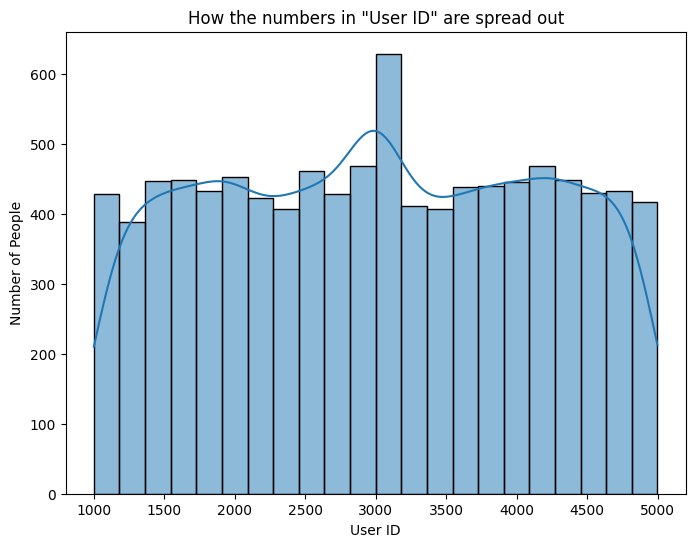

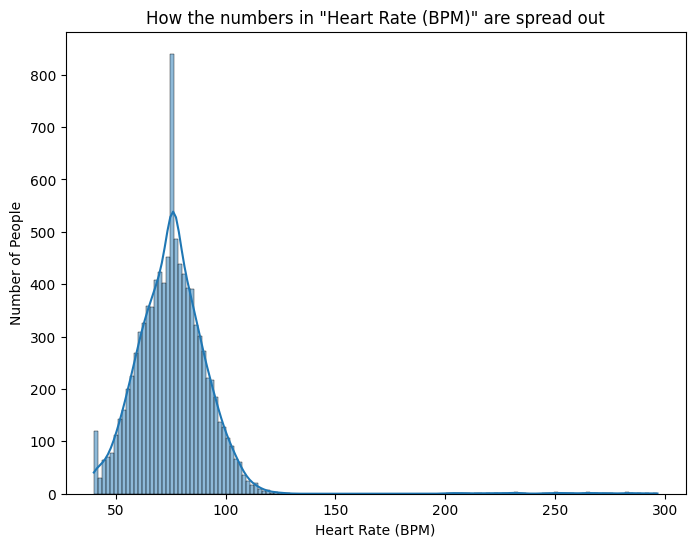

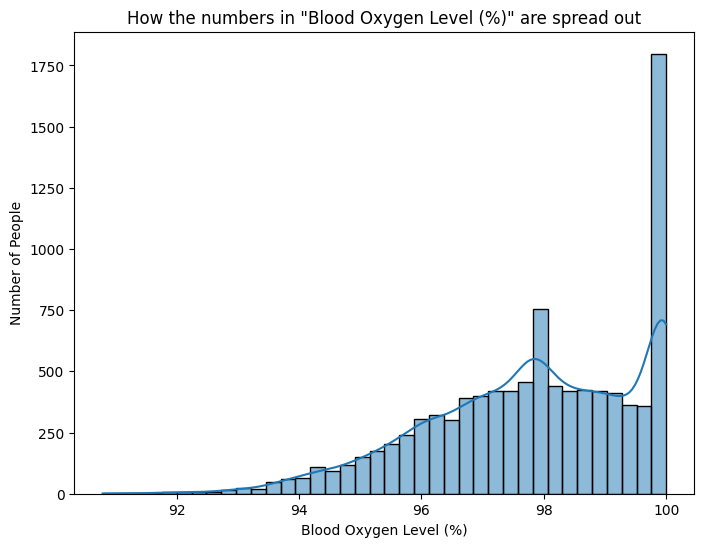

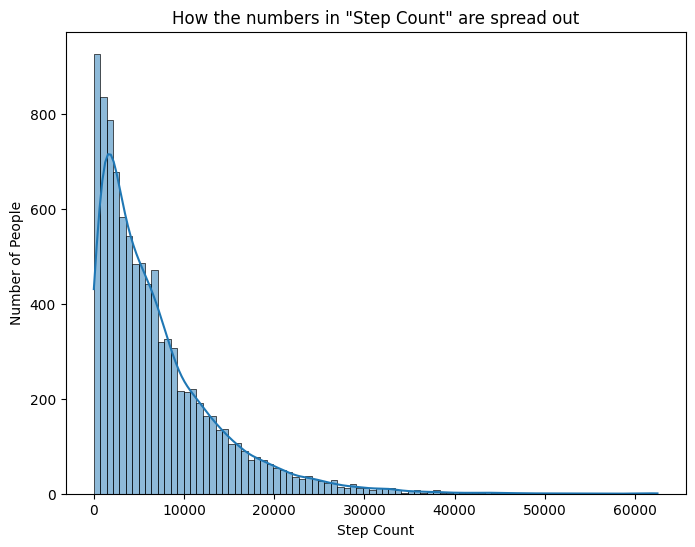

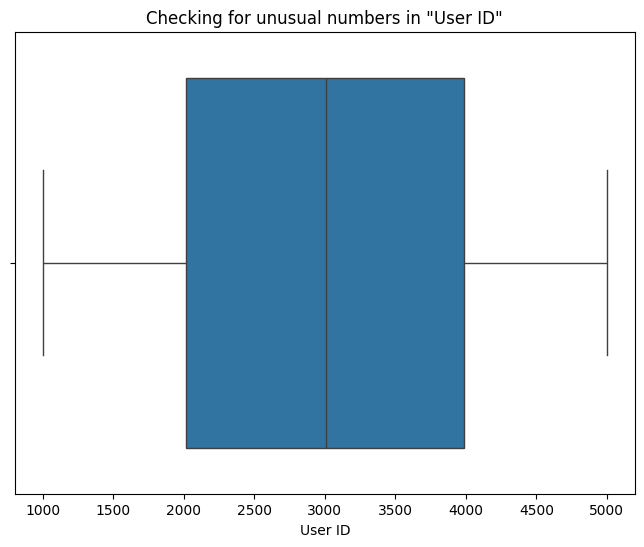

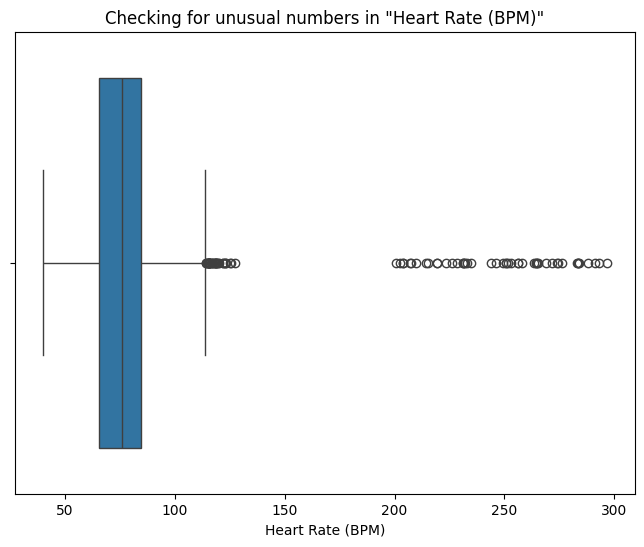

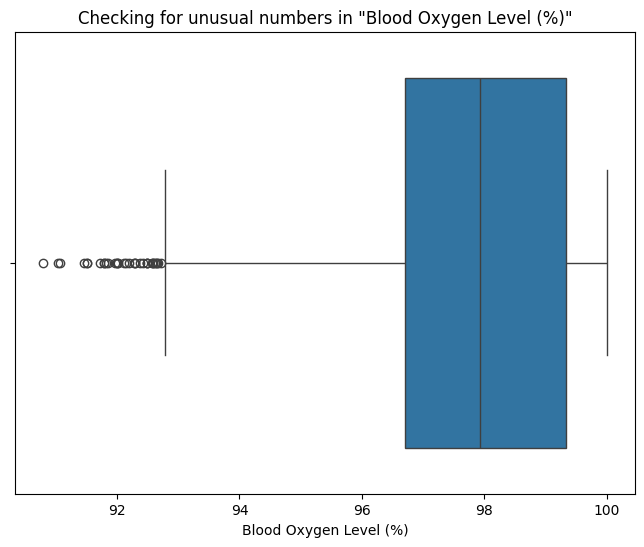

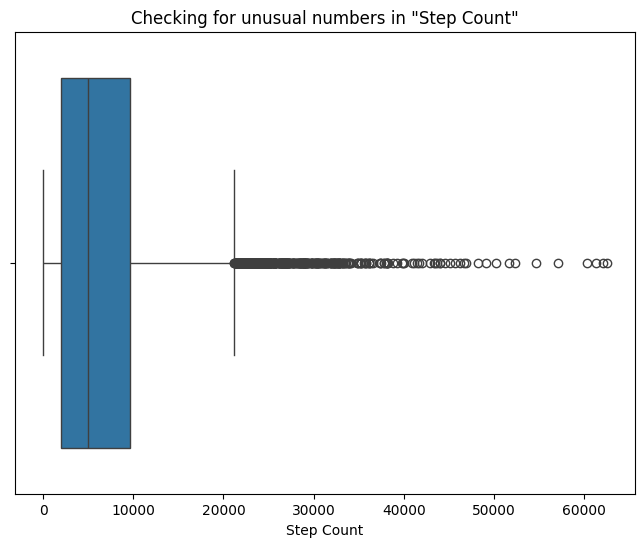

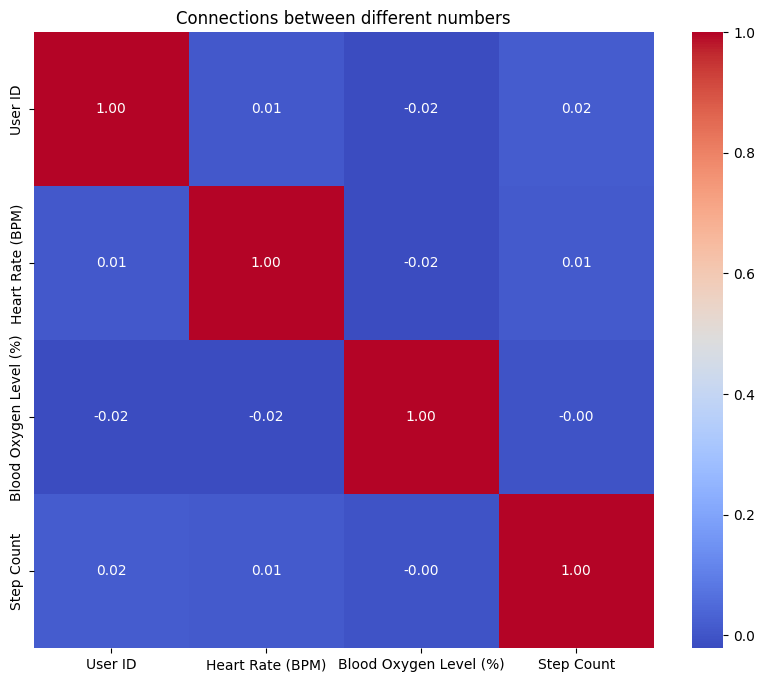

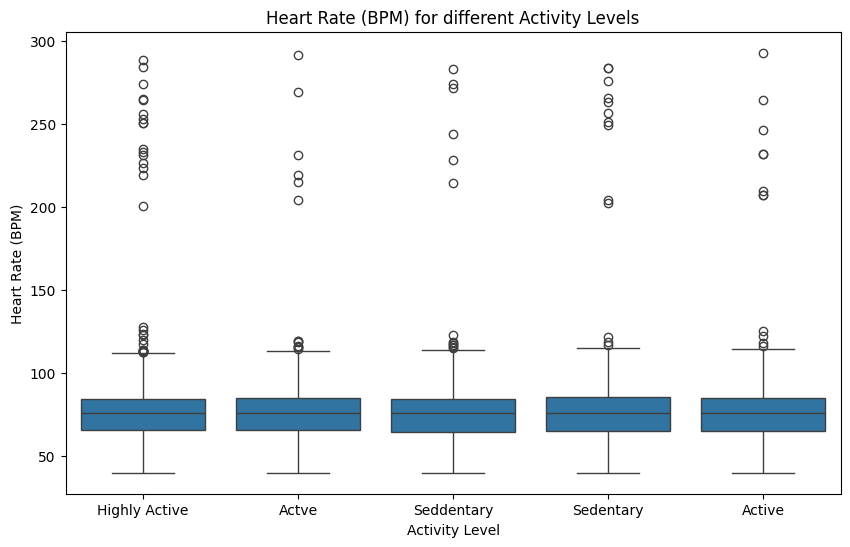

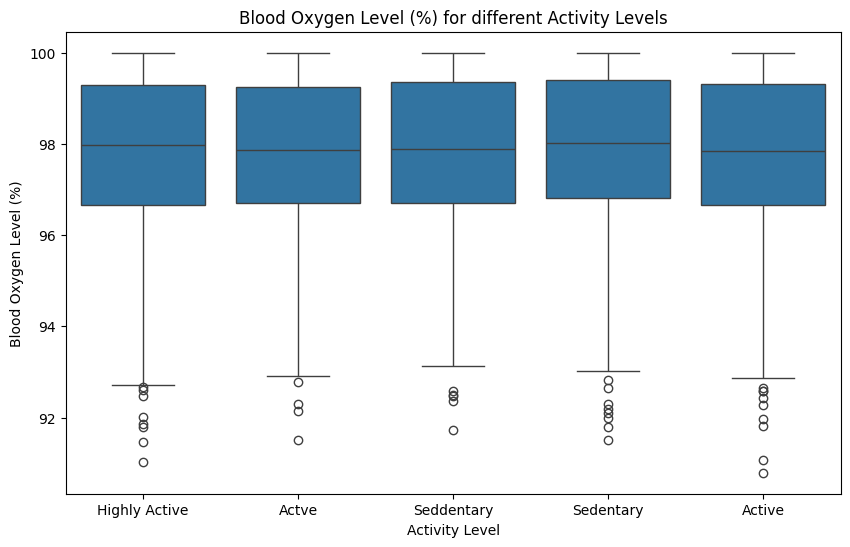

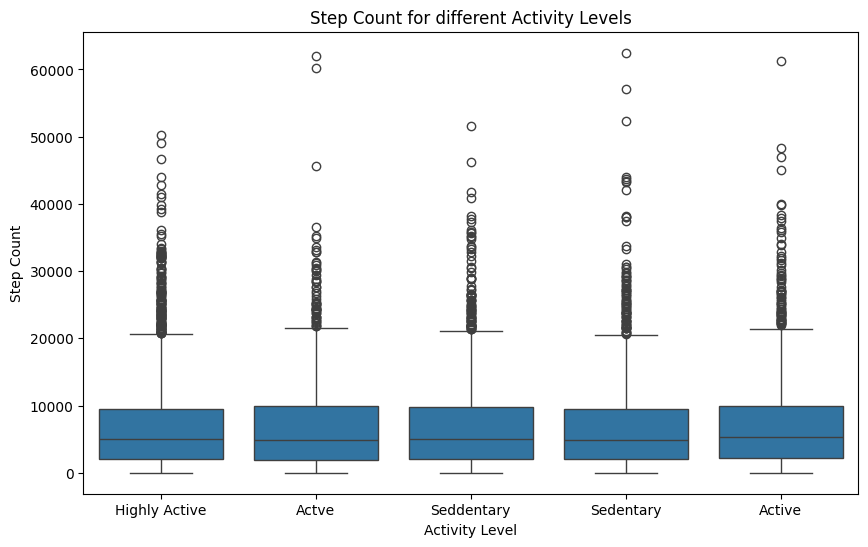

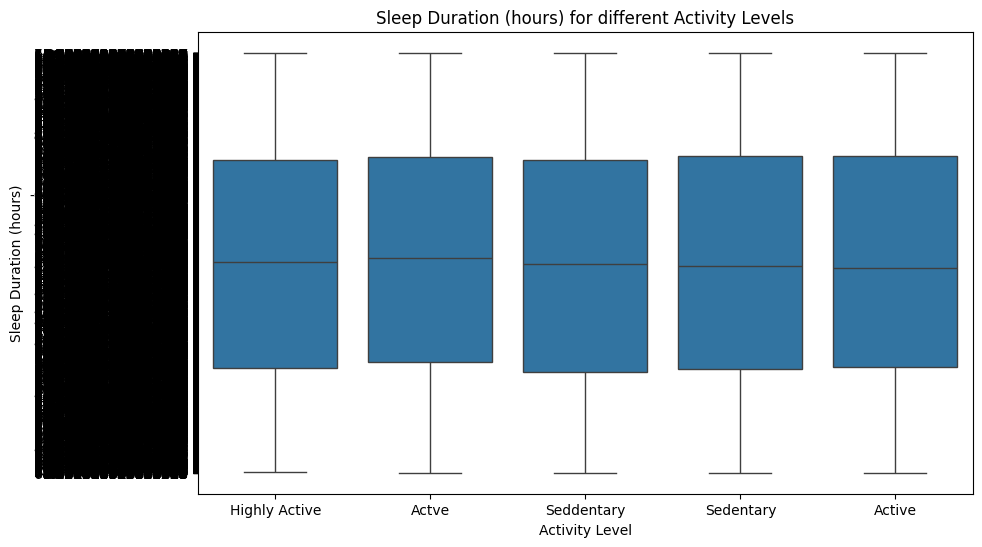

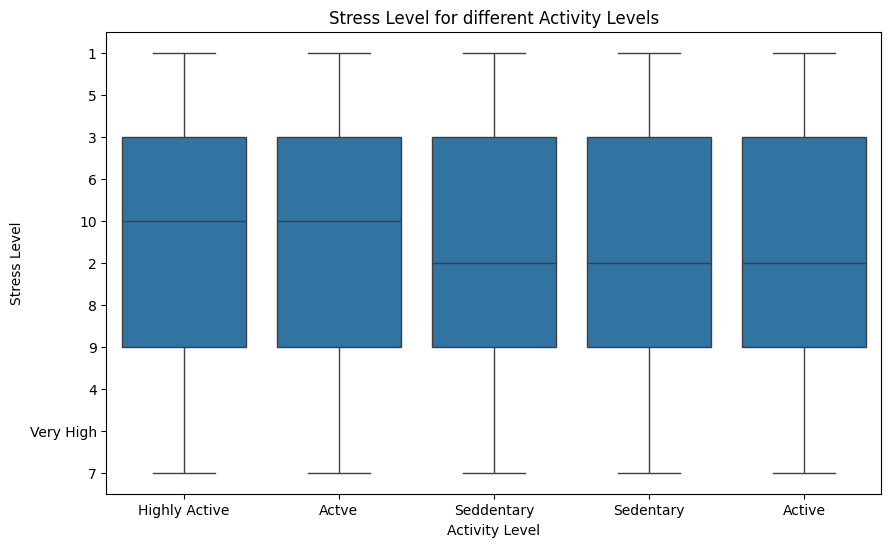

In [11]:


# Let's get some basic numbers that describe our data, like the average,
# the highest, and the lowest values for each number column.
print("\nBasic numbers that describe our data:")
print(df.describe())

# We can see how each number column is spread out using a histogram.
# It's like seeing how many friends are in each height group.
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'How the numbers in "{col}" are spread out')
    plt.xlabel(col)
    plt.ylabel('Number of People')
    plt.show()

# A box plot is another way to see the spread and also helps us spot
# those "outliers" we talked about earlier – the really unusual values.
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Checking for unusual numbers in "{col}"')
    plt.xlabel(col)
    plt.show()

# Let's see if there are any connections between different number columns.
# A correlation matrix shows us how strongly they are related.
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Connections between different numbers')
plt.show()

# Finally, let's see how the activity level relates to our number data.
# We can use box plots to compare the heart rate, steps, etc., for
# people with different activity levels.
numeric_cols = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level']
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Activity Level', y=col, data=df)
    plt.title(f'{col} for different Activity Levels')
    plt.xlabel('Activity Level')
    plt.ylabel(col)
    plt.show()